In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

import lightgbm 

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import PredefinedSplit
from sklearn.model_selection import GridSearchCV, ParameterGrid
from sklearn.metrics import (roc_curve, auc, accuracy_score)

In [3]:
train_df = pd.read_csv('/Users/aleksandr/Desktop/flight_delays_train.csv')
test_df = pd.read_csv('/Users/aleksandr/Desktop/flight_delays_test.csv')

In [4]:
test_df['Month'] = test_df['Month'].str[2:].astype('int')
test_df['DayofMonth'] = test_df['DayofMonth'].str[2:].astype('int')
test_df['DayOfWeek'] = test_df['DayOfWeek'].str[2:].astype('int')
test_df['DepTime_hour'] =  test_df['DepTime']//100
test_df['DepTime_minute'] =  test_df['DepTime']%100

train_df['Month'] = train_df['Month'].str[2:].astype('int')
train_df['DayofMonth'] = train_df['DayofMonth'].str[2:].astype('int')
train_df['DayOfWeek'] = train_df['DayOfWeek'].str[2:].astype('int')
train_df['DepTime_hour'] =  train_df['DepTime']//100
train_df['DepTime_minute'] =  train_df['DepTime']%100

In [5]:
test_df['low_delay'] = ((test_df['DepTime_hour'] >= 4) & (test_df['DepTime_hour'] < 9)).astype('int')
test_df['other_time'] = ((test_df['DepTime_hour'] < 9) & (test_df['DepTime_hour'] >=5)).astype('int')
test_df['delay_time'] = ((test_df['DepTime_hour'] >= 13) & (test_df['DepTime_hour'] < 24) | (test_df['DepTime_hour'] < 5)).astype('int')
test_df['middle_time'] = ((test_df['DepTime_hour'] >= 9) & (test_df['DepTime_hour'] < 13)).astype('int')



train_df['low_delay'] = ((train_df['DepTime_hour'] >= 4) & (train_df['DepTime_hour'] < 9)).astype('int')
train_df['other_time'] = ((train_df['DepTime_hour'] < 9) & (train_df['DepTime_hour'] >=5)).astype('int')
train_df['delay_time'] = ((train_df['DepTime_hour'] >= 13) & (train_df['DepTime_hour'] < 24) | (train_df['DepTime_hour'] < 5)).astype('int')
train_df['middle_time'] = ((train_df['DepTime_hour'] >= 9) & (train_df['DepTime_hour'] < 13)).astype('int')

In [6]:
train_df['morning'] = ((train_df['DepTime_hour'] >= 6) & (train_df['DepTime_hour'] < 12)).astype('int')
train_df['day'] = ((train_df['DepTime_hour'] >= 12) & (train_df['DepTime_hour'] < 18)).astype('int')
train_df['evening'] = ((train_df['DepTime_hour'] >= 18) & (train_df['DepTime_hour'] < 24)).astype('int')
train_df['night'] = ((train_df['DepTime_hour'] >= 0) & (train_df['DepTime_hour'] < 6)).astype('int')

test_df['morning'] = ((test_df['DepTime_hour'] >= 6) & (test_df['DepTime_hour'] < 12)).astype('int')
test_df['day'] = ((test_df['DepTime_hour'] >= 12) & (test_df['DepTime_hour'] < 18)).astype('int')
test_df['evening'] = ((test_df['DepTime_hour'] >= 18) & (test_df['DepTime_hour'] < 24)).astype('int')
test_df['night'] = ((test_df['DepTime_hour'] >= 0) & (test_df['DepTime_hour'] < 6)).astype('int')



In [7]:
train_df['month_x'] = ((train_df['Month'].isin([12, 6, 7]))).astype('int')
test_df['month_x'] = ((test_df['Month'].isin([12, 1]))).astype('int')

train_df['month_y'] = ((train_df['Month'].isin([4, 5, 9, 2]))).astype('int')
test_df['month_y'] = ((test_df['Month'].isin([12, 1]))).astype('int')

train_df['winter'] = ((train_df['Month'].isin([12, 1, 2]))).astype('int')
test_df['winter'] = ((test_df['Month'].isin([12, 1, 2]))).astype('int')

train_df['spring'] = ((train_df['Month'].isin([3, 4, 5]))).astype('int')
test_df['spring'] = ((test_df['Month'].isin([3, 4, 5]))).astype('int')

train_df['summer'] = ((train_df['Month'].isin([6, 7, 8]))).astype('int')
test_df['summer'] = ((test_df['Month'].isin([6, 7, 8]))).astype('int')

train_df['autumn'] = ((train_df['Month'].isin([9, 10, 11]))).astype('int')
test_df['autumn'] = ((test_df['Month'].isin([9, 10, 11]))).astype('int')

In [8]:
train_df['christmas_time']= (train_df['Month'].isin([12]) & (train_df['DayofMonth'] > 15)).astype('int')
test_df['christmas_time']= (test_df['Month'].isin([12]) & (test_df['DayofMonth'] > 15)).astype('int')
train_df['4july']= (train_df['Month'].isin([7]) & (train_df['DayofMonth'].between(2, 5))).astype('int')
test_df['4july']= (test_df['Month'].isin([7]) & (test_df['DayofMonth'].between(2, 5))).astype('int')
train_df['june']= (train_df['Month'].isin([6]) & (train_df['DayofMonth'] > 27)).astype('int')
test_df['june']= (test_df['Month'].isin([6]) & (test_df['DayofMonth'] > 27)).astype('int')
train_df['aug']= (train_df['Month'].isin([8]) & (train_df['DayofMonth'] ==10 )).astype('int')
test_df['aug']= (test_df['Month'].isin([6]) & (test_df['DayofMonth'] == 10)).astype('int')

In [9]:
train_df['s_hour'] = np.sin(2*np.pi*train_df['DepTime_hour']/24)
train_df['c_hour'] = np.cos(2*np.pi*train_df['DepTime_hour']/24)

test_df['s_hour'] = np.sin(2*np.pi*test_df['DepTime_hour']/24)
test_df['c_hour'] = np.cos(2*np.pi*test_df['DepTime_hour']/24)

In [10]:
train_df['ATL_or'] = (train_df['Origin'] == 'ATL').astype('int')
test_df['ATL_or'] = (test_df['Origin'] =='ATL').astype('int')
train_df['ORD_or'] = (train_df['Origin'] == 'ORD').astype('int')
test_df['ORD_or'] = (test_df['Origin'] == 'ORD').astype('int')
train_df['DFW_or'] = (train_df['Origin'] == 'DFW').astype('int')
test_df['DFW_or'] = (test_df['Origin'] == 'DFW').astype('int')

train_df['ATL_dest'] = (train_df['Dest'] == 'ATL').astype('int')
test_df['ATL_dest'] = (test_df['Dest'] =='ATL').astype('int')
train_df['ORD_dest'] = (train_df['Dest'] == 'ORD').astype('int')
test_df['ORD_dest'] = (test_df['Dest'] == 'ORD').astype('int')
train_df['DFW_dest'] = (train_df['Dest'] == 'DFW').astype('int')
test_df['DFW_dest'] = (test_df['Dest'] == 'DFW').astype('int')


In [14]:
test_df.head(1)

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,DepTime_hour,DepTime_minute,...,june,aug,s_hour,c_hour,ATL_or,ORD_or,DFW_or,ATL_dest,ORD_dest,DFW_dest
0,7,25,3,615,YV,MRY,PHX,598,6,15,...,0,0,1.0,6.123234e-17,0,0,0,0,0,0


In [96]:
train_df=pd.get_dummies(train_df, columns=[ 'Month','Origin',  'Dest', 'UniqueCarrier','DayofMonth' , 'DayOfWeek' ])
test_df=pd.get_dummies(test_df, columns=[ 'Month', 'Origin', 'Dest', 'UniqueCarrier', 'DayofMonth' , 'DayOfWeek' ])

In [97]:
train_df = train_df.drop([  'DepTime_minute'], axis = 1)

test_df = test_df.drop(['DepTime_minute'], axis = 1)

In [98]:
train_df['dep_delayed_15min']  = train_df['dep_delayed_15min'].replace('N', 0)
train_df['dep_delayed_15min']  = train_df['dep_delayed_15min'].replace('Y', 1)

In [99]:
y = train_df['dep_delayed_15min']

In [100]:
train_df = train_df.drop(['dep_delayed_15min'], axis =1)

In [101]:
x = train_df.values

In [102]:
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.3, random_state=42, stratify=y)

In [103]:
categorical_features = [c for c, col in enumerate(train_df.columns) if 'cat' in col]
train_data = lightgbm.Dataset(x_train, label=y_train, categorical_feature=categorical_features)
test_data = lightgbm.Dataset(x_valid, label=y_valid)

In [104]:




params = {}
params['learning_rate']= 0.05
params['boosting_type']='gbdt'
params['objective']='binary'
params['metric']='binary_logloss'
params['sub_feature']=0.5
params['num_leaves']= 10
params['min_data']=50
params['max_depth']=1

{'boosting_type': 'gbdt', 'colsample_bytree': 0.65, 'learning_rate': 0.005, 'n_estimators': 40, 'num_leaves': 6, 'objective': 'binary', 'random_state': 501, 'reg_alpha': 1, 'reg_lambda': 1, 'subsample': 0.7}
0.8095625

In [105]:


model = lightgbm.train(params,
                       train_data,
                       valid_sets=test_data,
                       num_boost_round=5000,
                       early_stopping_rounds=100)

[1]	valid_0's binary_logloss: 0.484816
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's binary_logloss: 0.48279
[3]	valid_0's binary_logloss: 0.480893
[4]	valid_0's binary_logloss: 0.479197
[5]	valid_0's binary_logloss: 0.477654
[6]	valid_0's binary_logloss: 0.476321
[7]	valid_0's binary_logloss: 0.474965
[8]	valid_0's binary_logloss: 0.473788
[9]	valid_0's binary_logloss: 0.472744
[10]	valid_0's binary_logloss: 0.471623
[11]	valid_0's binary_logloss: 0.470522
[12]	valid_0's binary_logloss: 0.469508
[13]	valid_0's binary_logloss: 0.468577
[14]	valid_0's binary_logloss: 0.467764
[15]	valid_0's binary_logloss: 0.466895
[16]	valid_0's binary_logloss: 0.466194
[17]	valid_0's binary_logloss: 0.465404
[18]	valid_0's binary_logloss: 0.464699
[19]	valid_0's binary_logloss: 0.464027
[20]	valid_0's binary_logloss: 0.463351
[21]	valid_0's binary_logloss: 0.462824
[22]	valid_0's binary_logloss: 0.462207
[23]	valid_0's binary_logloss: 0.461684
[24]	valid_0's binary_loglo

[225]	valid_0's binary_logloss: 0.444036
[226]	valid_0's binary_logloss: 0.444015
[227]	valid_0's binary_logloss: 0.443991
[228]	valid_0's binary_logloss: 0.44396
[229]	valid_0's binary_logloss: 0.443943
[230]	valid_0's binary_logloss: 0.443927
[231]	valid_0's binary_logloss: 0.443902
[232]	valid_0's binary_logloss: 0.443869
[233]	valid_0's binary_logloss: 0.443832
[234]	valid_0's binary_logloss: 0.443807
[235]	valid_0's binary_logloss: 0.443788
[236]	valid_0's binary_logloss: 0.443764
[237]	valid_0's binary_logloss: 0.443742
[238]	valid_0's binary_logloss: 0.443719
[239]	valid_0's binary_logloss: 0.443693
[240]	valid_0's binary_logloss: 0.443679
[241]	valid_0's binary_logloss: 0.443655
[242]	valid_0's binary_logloss: 0.443614
[243]	valid_0's binary_logloss: 0.443596
[244]	valid_0's binary_logloss: 0.443567
[245]	valid_0's binary_logloss: 0.443541
[246]	valid_0's binary_logloss: 0.443525
[247]	valid_0's binary_logloss: 0.443504
[248]	valid_0's binary_logloss: 0.443483
[249]	valid_0's b

[460]	valid_0's binary_logloss: 0.440133
[461]	valid_0's binary_logloss: 0.440135
[462]	valid_0's binary_logloss: 0.440115
[463]	valid_0's binary_logloss: 0.440096
[464]	valid_0's binary_logloss: 0.440091
[465]	valid_0's binary_logloss: 0.440087
[466]	valid_0's binary_logloss: 0.44008
[467]	valid_0's binary_logloss: 0.440064
[468]	valid_0's binary_logloss: 0.440052
[469]	valid_0's binary_logloss: 0.440037
[470]	valid_0's binary_logloss: 0.440027
[471]	valid_0's binary_logloss: 0.44002
[472]	valid_0's binary_logloss: 0.44001
[473]	valid_0's binary_logloss: 0.44
[474]	valid_0's binary_logloss: 0.439988
[475]	valid_0's binary_logloss: 0.439978
[476]	valid_0's binary_logloss: 0.439971
[477]	valid_0's binary_logloss: 0.439966
[478]	valid_0's binary_logloss: 0.439949
[479]	valid_0's binary_logloss: 0.439942
[480]	valid_0's binary_logloss: 0.439924
[481]	valid_0's binary_logloss: 0.439912
[482]	valid_0's binary_logloss: 0.439902
[483]	valid_0's binary_logloss: 0.439893
[484]	valid_0's binary_

[702]	valid_0's binary_logloss: 0.438107
[703]	valid_0's binary_logloss: 0.438103
[704]	valid_0's binary_logloss: 0.438099
[705]	valid_0's binary_logloss: 0.438089
[706]	valid_0's binary_logloss: 0.438085
[707]	valid_0's binary_logloss: 0.438073
[708]	valid_0's binary_logloss: 0.438065
[709]	valid_0's binary_logloss: 0.438063
[710]	valid_0's binary_logloss: 0.438053
[711]	valid_0's binary_logloss: 0.438043
[712]	valid_0's binary_logloss: 0.43804
[713]	valid_0's binary_logloss: 0.438044
[714]	valid_0's binary_logloss: 0.438038
[715]	valid_0's binary_logloss: 0.438027
[716]	valid_0's binary_logloss: 0.438021
[717]	valid_0's binary_logloss: 0.438017
[718]	valid_0's binary_logloss: 0.438006
[719]	valid_0's binary_logloss: 0.438002
[720]	valid_0's binary_logloss: 0.437994
[721]	valid_0's binary_logloss: 0.437993
[722]	valid_0's binary_logloss: 0.437981
[723]	valid_0's binary_logloss: 0.437974
[724]	valid_0's binary_logloss: 0.437962
[725]	valid_0's binary_logloss: 0.437952
[726]	valid_0's b

[909]	valid_0's binary_logloss: 0.436967
[910]	valid_0's binary_logloss: 0.436965
[911]	valid_0's binary_logloss: 0.436956
[912]	valid_0's binary_logloss: 0.436952
[913]	valid_0's binary_logloss: 0.436948
[914]	valid_0's binary_logloss: 0.436941
[915]	valid_0's binary_logloss: 0.43694
[916]	valid_0's binary_logloss: 0.436938
[917]	valid_0's binary_logloss: 0.436935
[918]	valid_0's binary_logloss: 0.436926
[919]	valid_0's binary_logloss: 0.436921
[920]	valid_0's binary_logloss: 0.436919
[921]	valid_0's binary_logloss: 0.436914
[922]	valid_0's binary_logloss: 0.436907
[923]	valid_0's binary_logloss: 0.4369
[924]	valid_0's binary_logloss: 0.436897
[925]	valid_0's binary_logloss: 0.436906
[926]	valid_0's binary_logloss: 0.436903
[927]	valid_0's binary_logloss: 0.436896
[928]	valid_0's binary_logloss: 0.436895
[929]	valid_0's binary_logloss: 0.436884
[930]	valid_0's binary_logloss: 0.436882
[931]	valid_0's binary_logloss: 0.436874
[932]	valid_0's binary_logloss: 0.436878
[933]	valid_0's bin

[1119]	valid_0's binary_logloss: 0.436172
[1120]	valid_0's binary_logloss: 0.43617
[1121]	valid_0's binary_logloss: 0.43617
[1122]	valid_0's binary_logloss: 0.436166
[1123]	valid_0's binary_logloss: 0.436159
[1124]	valid_0's binary_logloss: 0.436163
[1125]	valid_0's binary_logloss: 0.436156
[1126]	valid_0's binary_logloss: 0.436151
[1127]	valid_0's binary_logloss: 0.436148
[1128]	valid_0's binary_logloss: 0.436149
[1129]	valid_0's binary_logloss: 0.436149
[1130]	valid_0's binary_logloss: 0.436144
[1131]	valid_0's binary_logloss: 0.436141
[1132]	valid_0's binary_logloss: 0.436136
[1133]	valid_0's binary_logloss: 0.43613
[1134]	valid_0's binary_logloss: 0.436128
[1135]	valid_0's binary_logloss: 0.436121
[1136]	valid_0's binary_logloss: 0.436114
[1137]	valid_0's binary_logloss: 0.436107
[1138]	valid_0's binary_logloss: 0.436102
[1139]	valid_0's binary_logloss: 0.4361
[1140]	valid_0's binary_logloss: 0.436095
[1141]	valid_0's binary_logloss: 0.436095
[1142]	valid_0's binary_logloss: 0.4360

[1318]	valid_0's binary_logloss: 0.435641
[1319]	valid_0's binary_logloss: 0.435634
[1320]	valid_0's binary_logloss: 0.435633
[1321]	valid_0's binary_logloss: 0.435628
[1322]	valid_0's binary_logloss: 0.435622
[1323]	valid_0's binary_logloss: 0.43562
[1324]	valid_0's binary_logloss: 0.435616
[1325]	valid_0's binary_logloss: 0.435616
[1326]	valid_0's binary_logloss: 0.43562
[1327]	valid_0's binary_logloss: 0.43562
[1328]	valid_0's binary_logloss: 0.43562
[1329]	valid_0's binary_logloss: 0.435614
[1330]	valid_0's binary_logloss: 0.435611
[1331]	valid_0's binary_logloss: 0.435607
[1332]	valid_0's binary_logloss: 0.435609
[1333]	valid_0's binary_logloss: 0.435607
[1334]	valid_0's binary_logloss: 0.435604
[1335]	valid_0's binary_logloss: 0.435602
[1336]	valid_0's binary_logloss: 0.435596
[1337]	valid_0's binary_logloss: 0.435593
[1338]	valid_0's binary_logloss: 0.435588
[1339]	valid_0's binary_logloss: 0.435587
[1340]	valid_0's binary_logloss: 0.435586
[1341]	valid_0's binary_logloss: 0.435

[1557]	valid_0's binary_logloss: 0.435158
[1558]	valid_0's binary_logloss: 0.435154
[1559]	valid_0's binary_logloss: 0.435151
[1560]	valid_0's binary_logloss: 0.435148
[1561]	valid_0's binary_logloss: 0.435147
[1562]	valid_0's binary_logloss: 0.435147
[1563]	valid_0's binary_logloss: 0.435147
[1564]	valid_0's binary_logloss: 0.435144
[1565]	valid_0's binary_logloss: 0.435146
[1566]	valid_0's binary_logloss: 0.435144
[1567]	valid_0's binary_logloss: 0.435139
[1568]	valid_0's binary_logloss: 0.435138
[1569]	valid_0's binary_logloss: 0.435136
[1570]	valid_0's binary_logloss: 0.435133
[1571]	valid_0's binary_logloss: 0.435133
[1572]	valid_0's binary_logloss: 0.435132
[1573]	valid_0's binary_logloss: 0.435126
[1574]	valid_0's binary_logloss: 0.435127
[1575]	valid_0's binary_logloss: 0.435123
[1576]	valid_0's binary_logloss: 0.43512
[1577]	valid_0's binary_logloss: 0.435119
[1578]	valid_0's binary_logloss: 0.435115
[1579]	valid_0's binary_logloss: 0.43511
[1580]	valid_0's binary_logloss: 0.4

[1798]	valid_0's binary_logloss: 0.434792
[1799]	valid_0's binary_logloss: 0.434789
[1800]	valid_0's binary_logloss: 0.434789
[1801]	valid_0's binary_logloss: 0.434786
[1802]	valid_0's binary_logloss: 0.434783
[1803]	valid_0's binary_logloss: 0.434782
[1804]	valid_0's binary_logloss: 0.43478
[1805]	valid_0's binary_logloss: 0.434777
[1806]	valid_0's binary_logloss: 0.434777
[1807]	valid_0's binary_logloss: 0.434773
[1808]	valid_0's binary_logloss: 0.43477
[1809]	valid_0's binary_logloss: 0.434768
[1810]	valid_0's binary_logloss: 0.434769
[1811]	valid_0's binary_logloss: 0.434768
[1812]	valid_0's binary_logloss: 0.434763
[1813]	valid_0's binary_logloss: 0.43476
[1814]	valid_0's binary_logloss: 0.434761
[1815]	valid_0's binary_logloss: 0.434762
[1816]	valid_0's binary_logloss: 0.43476
[1817]	valid_0's binary_logloss: 0.434755
[1818]	valid_0's binary_logloss: 0.434753
[1819]	valid_0's binary_logloss: 0.434755
[1820]	valid_0's binary_logloss: 0.434756
[1821]	valid_0's binary_logloss: 0.434

[2026]	valid_0's binary_logloss: 0.434513
[2027]	valid_0's binary_logloss: 0.434515
[2028]	valid_0's binary_logloss: 0.434519
[2029]	valid_0's binary_logloss: 0.434518
[2030]	valid_0's binary_logloss: 0.434517
[2031]	valid_0's binary_logloss: 0.434512
[2032]	valid_0's binary_logloss: 0.43451
[2033]	valid_0's binary_logloss: 0.434512
[2034]	valid_0's binary_logloss: 0.43451
[2035]	valid_0's binary_logloss: 0.434508
[2036]	valid_0's binary_logloss: 0.434504
[2037]	valid_0's binary_logloss: 0.434501
[2038]	valid_0's binary_logloss: 0.434502
[2039]	valid_0's binary_logloss: 0.434499
[2040]	valid_0's binary_logloss: 0.434496
[2041]	valid_0's binary_logloss: 0.434492
[2042]	valid_0's binary_logloss: 0.43449
[2043]	valid_0's binary_logloss: 0.43449
[2044]	valid_0's binary_logloss: 0.434489
[2045]	valid_0's binary_logloss: 0.434487
[2046]	valid_0's binary_logloss: 0.434485
[2047]	valid_0's binary_logloss: 0.434481
[2048]	valid_0's binary_logloss: 0.434482
[2049]	valid_0's binary_logloss: 0.434

[2227]	valid_0's binary_logloss: 0.434293
[2228]	valid_0's binary_logloss: 0.434293
[2229]	valid_0's binary_logloss: 0.434293
[2230]	valid_0's binary_logloss: 0.434295
[2231]	valid_0's binary_logloss: 0.434295
[2232]	valid_0's binary_logloss: 0.434295
[2233]	valid_0's binary_logloss: 0.434301
[2234]	valid_0's binary_logloss: 0.4343
[2235]	valid_0's binary_logloss: 0.434298
[2236]	valid_0's binary_logloss: 0.434296
[2237]	valid_0's binary_logloss: 0.434295
[2238]	valid_0's binary_logloss: 0.434293
[2239]	valid_0's binary_logloss: 0.434292
[2240]	valid_0's binary_logloss: 0.434293
[2241]	valid_0's binary_logloss: 0.434293
[2242]	valid_0's binary_logloss: 0.434293
[2243]	valid_0's binary_logloss: 0.434289
[2244]	valid_0's binary_logloss: 0.434286
[2245]	valid_0's binary_logloss: 0.434285
[2246]	valid_0's binary_logloss: 0.434286
[2247]	valid_0's binary_logloss: 0.43428
[2248]	valid_0's binary_logloss: 0.43428
[2249]	valid_0's binary_logloss: 0.43428
[2250]	valid_0's binary_logloss: 0.4342

[2423]	valid_0's binary_logloss: 0.434122
[2424]	valid_0's binary_logloss: 0.434119
[2425]	valid_0's binary_logloss: 0.434116
[2426]	valid_0's binary_logloss: 0.434119
[2427]	valid_0's binary_logloss: 0.434116
[2428]	valid_0's binary_logloss: 0.434114
[2429]	valid_0's binary_logloss: 0.434114
[2430]	valid_0's binary_logloss: 0.434112
[2431]	valid_0's binary_logloss: 0.434114
[2432]	valid_0's binary_logloss: 0.434116
[2433]	valid_0's binary_logloss: 0.434116
[2434]	valid_0's binary_logloss: 0.434117
[2435]	valid_0's binary_logloss: 0.434116
[2436]	valid_0's binary_logloss: 0.434122
[2437]	valid_0's binary_logloss: 0.434121
[2438]	valid_0's binary_logloss: 0.434119
[2439]	valid_0's binary_logloss: 0.434119
[2440]	valid_0's binary_logloss: 0.434118
[2441]	valid_0's binary_logloss: 0.434116
[2442]	valid_0's binary_logloss: 0.434113
[2443]	valid_0's binary_logloss: 0.434113
[2444]	valid_0's binary_logloss: 0.434113
[2445]	valid_0's binary_logloss: 0.434111
[2446]	valid_0's binary_logloss: 0

[2621]	valid_0's binary_logloss: 0.433991
[2622]	valid_0's binary_logloss: 0.433991
[2623]	valid_0's binary_logloss: 0.433989
[2624]	valid_0's binary_logloss: 0.433987
[2625]	valid_0's binary_logloss: 0.433985
[2626]	valid_0's binary_logloss: 0.433982
[2627]	valid_0's binary_logloss: 0.433981
[2628]	valid_0's binary_logloss: 0.433981
[2629]	valid_0's binary_logloss: 0.433981
[2630]	valid_0's binary_logloss: 0.43398
[2631]	valid_0's binary_logloss: 0.43398
[2632]	valid_0's binary_logloss: 0.433977
[2633]	valid_0's binary_logloss: 0.433978
[2634]	valid_0's binary_logloss: 0.433978
[2635]	valid_0's binary_logloss: 0.433984
[2636]	valid_0's binary_logloss: 0.433982
[2637]	valid_0's binary_logloss: 0.433981
[2638]	valid_0's binary_logloss: 0.43398
[2639]	valid_0's binary_logloss: 0.433979
[2640]	valid_0's binary_logloss: 0.433978
[2641]	valid_0's binary_logloss: 0.433976
[2642]	valid_0's binary_logloss: 0.433976
[2643]	valid_0's binary_logloss: 0.433975
[2644]	valid_0's binary_logloss: 0.43

[2828]	valid_0's binary_logloss: 0.43383
[2829]	valid_0's binary_logloss: 0.433829
[2830]	valid_0's binary_logloss: 0.433829
[2831]	valid_0's binary_logloss: 0.433827
[2832]	valid_0's binary_logloss: 0.433825
[2833]	valid_0's binary_logloss: 0.433825
[2834]	valid_0's binary_logloss: 0.433827
[2835]	valid_0's binary_logloss: 0.433826
[2836]	valid_0's binary_logloss: 0.433827
[2837]	valid_0's binary_logloss: 0.433826
[2838]	valid_0's binary_logloss: 0.433826
[2839]	valid_0's binary_logloss: 0.433827
[2840]	valid_0's binary_logloss: 0.433826
[2841]	valid_0's binary_logloss: 0.433824
[2842]	valid_0's binary_logloss: 0.433822
[2843]	valid_0's binary_logloss: 0.43382
[2844]	valid_0's binary_logloss: 0.43382
[2845]	valid_0's binary_logloss: 0.43382
[2846]	valid_0's binary_logloss: 0.43382
[2847]	valid_0's binary_logloss: 0.433818
[2848]	valid_0's binary_logloss: 0.433819
[2849]	valid_0's binary_logloss: 0.433818
[2850]	valid_0's binary_logloss: 0.433817
[2851]	valid_0's binary_logloss: 0.4338

[3030]	valid_0's binary_logloss: 0.433706
[3031]	valid_0's binary_logloss: 0.433706
[3032]	valid_0's binary_logloss: 0.433705
[3033]	valid_0's binary_logloss: 0.433702
[3034]	valid_0's binary_logloss: 0.433702
[3035]	valid_0's binary_logloss: 0.4337
[3036]	valid_0's binary_logloss: 0.433701
[3037]	valid_0's binary_logloss: 0.433698
[3038]	valid_0's binary_logloss: 0.433699
[3039]	valid_0's binary_logloss: 0.4337
[3040]	valid_0's binary_logloss: 0.433697
[3041]	valid_0's binary_logloss: 0.433697
[3042]	valid_0's binary_logloss: 0.433698
[3043]	valid_0's binary_logloss: 0.433698
[3044]	valid_0's binary_logloss: 0.4337
[3045]	valid_0's binary_logloss: 0.433698
[3046]	valid_0's binary_logloss: 0.4337
[3047]	valid_0's binary_logloss: 0.433698
[3048]	valid_0's binary_logloss: 0.433695
[3049]	valid_0's binary_logloss: 0.433693
[3050]	valid_0's binary_logloss: 0.433694
[3051]	valid_0's binary_logloss: 0.433693
[3052]	valid_0's binary_logloss: 0.433694
[3053]	valid_0's binary_logloss: 0.433691


[3249]	valid_0's binary_logloss: 0.433602
[3250]	valid_0's binary_logloss: 0.433601
[3251]	valid_0's binary_logloss: 0.433601
[3252]	valid_0's binary_logloss: 0.433601
[3253]	valid_0's binary_logloss: 0.433599
[3254]	valid_0's binary_logloss: 0.433598
[3255]	valid_0's binary_logloss: 0.433598
[3256]	valid_0's binary_logloss: 0.433597
[3257]	valid_0's binary_logloss: 0.433597
[3258]	valid_0's binary_logloss: 0.433598
[3259]	valid_0's binary_logloss: 0.433595
[3260]	valid_0's binary_logloss: 0.433592
[3261]	valid_0's binary_logloss: 0.433591
[3262]	valid_0's binary_logloss: 0.43359
[3263]	valid_0's binary_logloss: 0.433591
[3264]	valid_0's binary_logloss: 0.433592
[3265]	valid_0's binary_logloss: 0.43359
[3266]	valid_0's binary_logloss: 0.43359
[3267]	valid_0's binary_logloss: 0.43359
[3268]	valid_0's binary_logloss: 0.433586
[3269]	valid_0's binary_logloss: 0.433587
[3270]	valid_0's binary_logloss: 0.433587
[3271]	valid_0's binary_logloss: 0.433586
[3272]	valid_0's binary_logloss: 0.433

[3455]	valid_0's binary_logloss: 0.433509
[3456]	valid_0's binary_logloss: 0.433506
[3457]	valid_0's binary_logloss: 0.433508
[3458]	valid_0's binary_logloss: 0.433507
[3459]	valid_0's binary_logloss: 0.433506
[3460]	valid_0's binary_logloss: 0.433503
[3461]	valid_0's binary_logloss: 0.433501
[3462]	valid_0's binary_logloss: 0.433502
[3463]	valid_0's binary_logloss: 0.433502
[3464]	valid_0's binary_logloss: 0.433504
[3465]	valid_0's binary_logloss: 0.433503
[3466]	valid_0's binary_logloss: 0.433502
[3467]	valid_0's binary_logloss: 0.4335
[3468]	valid_0's binary_logloss: 0.433499
[3469]	valid_0's binary_logloss: 0.433501
[3470]	valid_0's binary_logloss: 0.4335
[3471]	valid_0's binary_logloss: 0.433498
[3472]	valid_0's binary_logloss: 0.433497
[3473]	valid_0's binary_logloss: 0.433499
[3474]	valid_0's binary_logloss: 0.433499
[3475]	valid_0's binary_logloss: 0.433496
[3476]	valid_0's binary_logloss: 0.433496
[3477]	valid_0's binary_logloss: 0.433496
[3478]	valid_0's binary_logloss: 0.433

[3663]	valid_0's binary_logloss: 0.433427
[3664]	valid_0's binary_logloss: 0.433428
[3665]	valid_0's binary_logloss: 0.433429
[3666]	valid_0's binary_logloss: 0.433429
[3667]	valid_0's binary_logloss: 0.433429
[3668]	valid_0's binary_logloss: 0.433429
[3669]	valid_0's binary_logloss: 0.433429
[3670]	valid_0's binary_logloss: 0.433427
[3671]	valid_0's binary_logloss: 0.433425
[3672]	valid_0's binary_logloss: 0.433422
[3673]	valid_0's binary_logloss: 0.433421
[3674]	valid_0's binary_logloss: 0.433421
[3675]	valid_0's binary_logloss: 0.433421
[3676]	valid_0's binary_logloss: 0.433419
[3677]	valid_0's binary_logloss: 0.433416
[3678]	valid_0's binary_logloss: 0.433415
[3679]	valid_0's binary_logloss: 0.433416
[3680]	valid_0's binary_logloss: 0.433416
[3681]	valid_0's binary_logloss: 0.433415
[3682]	valid_0's binary_logloss: 0.433412
[3683]	valid_0's binary_logloss: 0.433412
[3684]	valid_0's binary_logloss: 0.433412
[3685]	valid_0's binary_logloss: 0.433411
[3686]	valid_0's binary_logloss: 0

[3869]	valid_0's binary_logloss: 0.433349
[3870]	valid_0's binary_logloss: 0.433347
[3871]	valid_0's binary_logloss: 0.433346
[3872]	valid_0's binary_logloss: 0.433344
[3873]	valid_0's binary_logloss: 0.433346
[3874]	valid_0's binary_logloss: 0.433345
[3875]	valid_0's binary_logloss: 0.433346
[3876]	valid_0's binary_logloss: 0.433345
[3877]	valid_0's binary_logloss: 0.433344
[3878]	valid_0's binary_logloss: 0.433344
[3879]	valid_0's binary_logloss: 0.433345
[3880]	valid_0's binary_logloss: 0.433346
[3881]	valid_0's binary_logloss: 0.433346
[3882]	valid_0's binary_logloss: 0.433343
[3883]	valid_0's binary_logloss: 0.433344
[3884]	valid_0's binary_logloss: 0.433344
[3885]	valid_0's binary_logloss: 0.433342
[3886]	valid_0's binary_logloss: 0.433343
[3887]	valid_0's binary_logloss: 0.433341
[3888]	valid_0's binary_logloss: 0.433341
[3889]	valid_0's binary_logloss: 0.43334
[3890]	valid_0's binary_logloss: 0.433341
[3891]	valid_0's binary_logloss: 0.43334
[3892]	valid_0's binary_logloss: 0.4

[4100]	valid_0's binary_logloss: 0.433271
[4101]	valid_0's binary_logloss: 0.433271
[4102]	valid_0's binary_logloss: 0.433271
[4103]	valid_0's binary_logloss: 0.433272
[4104]	valid_0's binary_logloss: 0.433271
[4105]	valid_0's binary_logloss: 0.43327
[4106]	valid_0's binary_logloss: 0.433271
[4107]	valid_0's binary_logloss: 0.433272
[4108]	valid_0's binary_logloss: 0.433271
[4109]	valid_0's binary_logloss: 0.433272
[4110]	valid_0's binary_logloss: 0.433273
[4111]	valid_0's binary_logloss: 0.433272
[4112]	valid_0's binary_logloss: 0.433271
[4113]	valid_0's binary_logloss: 0.43327
[4114]	valid_0's binary_logloss: 0.433272
[4115]	valid_0's binary_logloss: 0.433271
[4116]	valid_0's binary_logloss: 0.43327
[4117]	valid_0's binary_logloss: 0.433268
[4118]	valid_0's binary_logloss: 0.433267
[4119]	valid_0's binary_logloss: 0.433267
[4120]	valid_0's binary_logloss: 0.433268
[4121]	valid_0's binary_logloss: 0.433267
[4122]	valid_0's binary_logloss: 0.433268
[4123]	valid_0's binary_logloss: 0.43

[4343]	valid_0's binary_logloss: 0.433201
[4344]	valid_0's binary_logloss: 0.433201
[4345]	valid_0's binary_logloss: 0.433201
[4346]	valid_0's binary_logloss: 0.4332
[4347]	valid_0's binary_logloss: 0.4332
[4348]	valid_0's binary_logloss: 0.433199
[4349]	valid_0's binary_logloss: 0.433201
[4350]	valid_0's binary_logloss: 0.433199
[4351]	valid_0's binary_logloss: 0.433199
[4352]	valid_0's binary_logloss: 0.433199
[4353]	valid_0's binary_logloss: 0.433201
[4354]	valid_0's binary_logloss: 0.4332
[4355]	valid_0's binary_logloss: 0.4332
[4356]	valid_0's binary_logloss: 0.4332
[4357]	valid_0's binary_logloss: 0.433201
[4358]	valid_0's binary_logloss: 0.433203
[4359]	valid_0's binary_logloss: 0.433202
[4360]	valid_0's binary_logloss: 0.433202
[4361]	valid_0's binary_logloss: 0.433201
[4362]	valid_0's binary_logloss: 0.433201
[4363]	valid_0's binary_logloss: 0.433199
[4364]	valid_0's binary_logloss: 0.4332
[4365]	valid_0's binary_logloss: 0.4332
[4366]	valid_0's binary_logloss: 0.433199
[4367]

[4566]	valid_0's binary_logloss: 0.433155
[4567]	valid_0's binary_logloss: 0.433154
[4568]	valid_0's binary_logloss: 0.433154
[4569]	valid_0's binary_logloss: 0.433152
[4570]	valid_0's binary_logloss: 0.433152
[4571]	valid_0's binary_logloss: 0.433151
[4572]	valid_0's binary_logloss: 0.43315
[4573]	valid_0's binary_logloss: 0.43315
[4574]	valid_0's binary_logloss: 0.43315
[4575]	valid_0's binary_logloss: 0.433149
[4576]	valid_0's binary_logloss: 0.433148
[4577]	valid_0's binary_logloss: 0.433147
[4578]	valid_0's binary_logloss: 0.433147
[4579]	valid_0's binary_logloss: 0.433148
[4580]	valid_0's binary_logloss: 0.433147
[4581]	valid_0's binary_logloss: 0.433149
[4582]	valid_0's binary_logloss: 0.433148
[4583]	valid_0's binary_logloss: 0.433147
[4584]	valid_0's binary_logloss: 0.433147
[4585]	valid_0's binary_logloss: 0.433149
[4586]	valid_0's binary_logloss: 0.433148
[4587]	valid_0's binary_logloss: 0.433147
[4588]	valid_0's binary_logloss: 0.433146
[4589]	valid_0's binary_logloss: 0.43

[4766]	valid_0's binary_logloss: 0.433107
[4767]	valid_0's binary_logloss: 0.433109
[4768]	valid_0's binary_logloss: 0.43311
[4769]	valid_0's binary_logloss: 0.433108
[4770]	valid_0's binary_logloss: 0.433109
[4771]	valid_0's binary_logloss: 0.433109
[4772]	valid_0's binary_logloss: 0.433109
[4773]	valid_0's binary_logloss: 0.433109
[4774]	valid_0's binary_logloss: 0.433107
[4775]	valid_0's binary_logloss: 0.433107
[4776]	valid_0's binary_logloss: 0.433107
[4777]	valid_0's binary_logloss: 0.433108
[4778]	valid_0's binary_logloss: 0.433106
[4779]	valid_0's binary_logloss: 0.433108
[4780]	valid_0's binary_logloss: 0.433108
[4781]	valid_0's binary_logloss: 0.433108
[4782]	valid_0's binary_logloss: 0.433107
[4783]	valid_0's binary_logloss: 0.433106
[4784]	valid_0's binary_logloss: 0.433105
[4785]	valid_0's binary_logloss: 0.433106
[4786]	valid_0's binary_logloss: 0.433107
[4787]	valid_0's binary_logloss: 0.433106
[4788]	valid_0's binary_logloss: 0.433105
[4789]	valid_0's binary_logloss: 0.

[4968]	valid_0's binary_logloss: 0.433079
[4969]	valid_0's binary_logloss: 0.43308
[4970]	valid_0's binary_logloss: 0.433081
[4971]	valid_0's binary_logloss: 0.433079
[4972]	valid_0's binary_logloss: 0.433078
[4973]	valid_0's binary_logloss: 0.43308
[4974]	valid_0's binary_logloss: 0.43308
[4975]	valid_0's binary_logloss: 0.433081
[4976]	valid_0's binary_logloss: 0.433079
[4977]	valid_0's binary_logloss: 0.433078
[4978]	valid_0's binary_logloss: 0.433077
[4979]	valid_0's binary_logloss: 0.433076
[4980]	valid_0's binary_logloss: 0.433075
[4981]	valid_0's binary_logloss: 0.433075
[4982]	valid_0's binary_logloss: 0.433074
[4983]	valid_0's binary_logloss: 0.433074
[4984]	valid_0's binary_logloss: 0.433074
[4985]	valid_0's binary_logloss: 0.433072
[4986]	valid_0's binary_logloss: 0.433071
[4987]	valid_0's binary_logloss: 0.433073
[4988]	valid_0's binary_logloss: 0.433072
[4989]	valid_0's binary_logloss: 0.433072
[4990]	valid_0's binary_logloss: 0.433071
[4991]	valid_0's binary_logloss: 0.43

In [259]:
#0.432842

In [106]:
submission = test_df

x = submission.values
y = model.predict(x)

pd.Series(y, name='dep_delayed_15min').to_csv('submit_3.csv', index_label='id', header=True)

In [38]:
params = {'boosting_type': 'gbdt',
          'max_depth' : -1,
          'objective': 'binary',
          'nthread': 3, # Updated from nthread
          'num_leaves': 64,
          'learning_rate': 0.1,
          'max_bin': 512,
          'subsample_for_bin': 200,
          'subsample': 1,
          'subsample_freq': 1,
          'colsample_bytree': 0.8,
          'reg_alpha': 5,
          'reg_lambda': 10,
          'min_split_gain': 0.5,
          'min_child_weight': 1,
          'min_child_samples': 5,
          'scale_pos_weight': 1,
          'num_class' : 1,
          'metric' : 'binary_error'}

In [39]:
gridParams = {
    'learning_rate': [0.1],
    'n_estimators': [40],
    'num_leaves': [6,8,12,16],
    'boosting_type' : ['gbdt'],
    'objective' : ['binary'],
    'random_state' : [42], # Updated from 'seed'
    'colsample_bytree' : [0.65, 0.66],
    'subsample' : [0.7,0.75],
    'reg_alpha' : [1,1.2],
    'reg_lambda' : [1,1.2,1.4],
    }

In [40]:
import lightgbm as lgb

In [41]:
mdl = lgb.LGBMClassifier(boosting_type= 'gbdt',
          objective = 'binary',
          n_jobs = 3, # Updated from 'nthread'
          silent = True,
          max_depth = params['max_depth'],
          max_bin = params['max_bin'],
          subsample_for_bin = params['subsample_for_bin'],
          subsample = params['subsample'],
          subsample_freq = params['subsample_freq'],
          min_split_gain = params['min_split_gain'],
          min_child_weight = params['min_child_weight'],
          min_child_samples = params['min_child_samples'],
          scale_pos_weight = params['scale_pos_weight'])

In [42]:
mdl.get_params().keys()

dict_keys(['boosting_type', 'class_weight', 'colsample_bytree', 'importance_type', 'learning_rate', 'max_depth', 'min_child_samples', 'min_child_weight', 'min_split_gain', 'n_estimators', 'n_jobs', 'num_leaves', 'objective', 'random_state', 'reg_alpha', 'reg_lambda', 'silent', 'subsample', 'subsample_for_bin', 'subsample_freq', 'max_bin', 'scale_pos_weight'])

In [43]:
grid = GridSearchCV(mdl, gridParams,
                    verbose=0,
                    cv=5,
                    n_jobs=2)
# Run the grid
grid.fit(x_train, y_train)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.1, max_bin=512,
        max_depth=-1, min_child_samples=5, min_child_weight=1,
        min_split_gain=0.5, n_estimators=100, n_jobs=3, num_leaves=31,
        objective='binary', random_state=None, reg_alpha=0.0,
        reg_lambda=0.0, scale_pos_weight=1, silent=True, subsample=1,
        subsample_for_bin=200, subsample_freq=1),
       fit_params=None, iid='warn', n_jobs=2,
       param_grid={'learning_rate': [0.1], 'n_estimators': [40], 'num_leaves': [6, 8, 12, 16], 'boosting_type': ['gbdt'], 'objective': ['binary'], 'random_state': [42], 'colsample_bytree': [0.65, 0.66], 'subsample': [0.7, 0.75], 'reg_alpha': [1, 1.2], 'reg_lambda': [1, 1.2, 1.4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [44]:
print(grid.best_params_)
print(grid.best_score_)

{'boosting_type': 'gbdt', 'colsample_bytree': 0.65, 'learning_rate': 0.1, 'n_estimators': 40, 'num_leaves': 16, 'objective': 'binary', 'random_state': 42, 'reg_alpha': 1.2, 'reg_lambda': 1.4, 'subsample': 0.75}
0.8164571428571429


In [45]:
params['colsample_bytree'] = grid.best_params_['colsample_bytree']
params['learning_rate'] = grid.best_params_['learning_rate']
params['n_estimators'] = grid.best_params_['n_estimators']

In [46]:
params['num_leaves'] = grid.best_params_['num_leaves']
params['reg_alpha'] = grid.best_params_['reg_alpha']
params['reg_lambda'] = grid.best_params_['reg_lambda']
params['subsample'] = grid.best_params_['subsample']

In [47]:
print('Fitting with params: ')
print(params)

Fitting with params: 
{'boosting_type': 'gbdt', 'max_depth': -1, 'objective': 'binary', 'nthread': 3, 'num_leaves': 16, 'learning_rate': 0.1, 'max_bin': 512, 'subsample_for_bin': 200, 'subsample': 0.75, 'subsample_freq': 1, 'colsample_bytree': 0.65, 'reg_alpha': 1.2, 'reg_lambda': 1.4, 'min_split_gain': 0.5, 'min_child_weight': 1, 'min_child_samples': 5, 'scale_pos_weight': 1, 'num_class': 1, 'metric': 'binary_error', 'n_estimators': 40}


In [346]:
import matplotlib.pyplot as plt

In [50]:
gbm = lgb.train(params,
                    train_data,
                    5000,
                    valid_sets=test_data,
                    early_stopping_rounds=50,
                    verbose_eval=4)

Training until validation scores don't improve for 50 rounds.
[4]	valid_0's binary_error: 0.190433
[8]	valid_0's binary_error: 0.190367
[12]	valid_0's binary_error: 0.189467
[16]	valid_0's binary_error: 0.1883
[20]	valid_0's binary_error: 0.186633
[24]	valid_0's binary_error: 0.1855
[28]	valid_0's binary_error: 0.1846
[32]	valid_0's binary_error: 0.184467
[36]	valid_0's binary_error: 0.184133
[40]	valid_0's binary_error: 0.183267
Did not meet early stopping. Best iteration is:
[40]	valid_0's binary_error: 0.183267


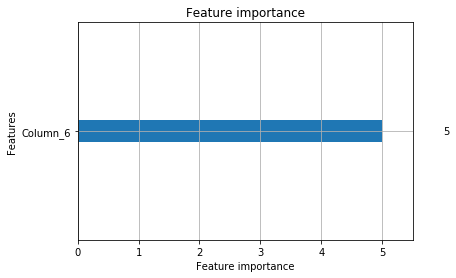

In [348]:
lgb.plot_importance(gbm)
plt.show()

In [52]:
submission = test_df

x = submission.values
y = gbm.predict(x)

pd.Series(y, name='dep_delayed_15min').to_csv('submit_3.csv', index_label='id', header=True)